# Filtros de derivadas

<table align="center">
  <td align="center"><a target="_blank" href="https://colab.research.google.com/github/mfidabel/tareas_pdi/blob/main/tareas/Tarea_Filtros_de_derivadas.ipynb">
        <img src="https://i.ibb.co/2P3SLwK/colab.png"  style="padding-bottom:5px;" />Correr en Google Colab</a></td>
  <td align="center"><a target="_blank" href="https://github.com/mfidabel/tareas_pdi/blob/main/tareas/Tarea_Filtros_de_derivadas.ipynb">
        <img src="https://i.ibb.co/xfJbPmL/github.png"  height="70px" style="padding-bottom:5px;"  />Ver Código Fuente en GitHub</a></td>
</table>


**Procesamiento Digital de Imágenes**

Mateo Andrés Fidabel Gill

En ambos casos genere filtros cuadrados de 7X7. Muestre el desarrollo para llegar al filtro final.

1. Crear filtro laplaciano
2. Crear un Filtro binomial de derivada en  x = 2 y derivada en y= 3 o 5.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal, special
import PIL.Image as Image

!wget https://github.com/mfidabel/tareas_pdi/raw/c0b54dd226e9896197f8cb11f6d80886b60ec1d4/imagenes/bernandita.jpg

--2022-04-05 03:49:49--  https://github.com/mfidabel/tareas_pdi/raw/c0b54dd226e9896197f8cb11f6d80886b60ec1d4/imagenes/bernandita.jpg
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mfidabel/tareas_pdi/c0b54dd226e9896197f8cb11f6d80886b60ec1d4/imagenes/bernandita.jpg [following]
--2022-04-05 03:49:49--  https://raw.githubusercontent.com/mfidabel/tareas_pdi/c0b54dd226e9896197f8cb11f6d80886b60ec1d4/imagenes/bernandita.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7447395 (7.1M) [application/octet-stream]
Saving to: ‘bernandita.jpg.1’

bernandita.jpg.1    100%[===================>]   7.10M  --.

**1. Crear un filtro laplaciano 7x7**

\begin{equation}
  f_N^r(x) = 	\nabla^r \binom{N - r}{x} = \nabla^{r-1} \binom{N - r}{x} - \nabla^{r-1} \binom{N-r}{x-1}
\end{equation}

In [2]:
# Primero debemos poder hallar el filtro binomial de cualquier orden de derivada
def coef_binomial(orden: int, N: int):
  if orden == 0:
    return lambda x: special.comb(N, x)
  else:
    def binomial_recursivo(x):
      if x < 0:
        return 0

      return - coef_binomial(orden, N)(x - 1) + coef_binomial(orden - 1, N)(x) - coef_binomial(orden - 1, N)(x - 1)

    return binomial_recursivo

    
def generar_coef(orden: int, N: int):
  return [coef_binomial(orden, N)(x) for x in range(N+1)]

In [3]:
assert np.array_equal(generar_coef(0, 0), [1]), "Orden 0, Nivel 0 -> 1"
assert np.array_equal(generar_coef(0, 1), [1, 1]), "Orden 0, Nivel 1 -> 1 1"
assert np.array_equal(generar_coef(0, 2), [1, 2, 1]), "Orden 0, Nivel 2 -> 1 2 1"
assert np.array_equal(generar_coef(1, 1), [1, -1]), "Orden 1, Nivel 1 -> 1 -1"
assert np.array_equal(generar_coef(1, 2), [1, 0, -1]), "Orden 1, Nivel 2 -> 1 0 -1"
assert np.array_equal(generar_coef(2, 2), [1, -2, 1]), "Orden 2, Nivel 2 -> 1 -2 1"
assert np.array_equal(generar_coef(2, 3), [1, -1, -1, 1]), "Orden 2, Nivel 3 -> 1 -1 -1 1"

Definimos un filtro laplaciano 7x7 como la segunda derivada del binomial en $x$ e $y$ en el nivel 6:

$f_l(x, y) = \frac{\partial f(x, y)}{∂ x^2 y^0} + \frac{\partial f(x, y)}{∂ y^2 x^0}$

In [4]:
def generar_laplaciana(orden: int):
  # Obtenemos la de segundo orden
  derivada_2 = np.array([generar_coef(2, orden - 1)])

  # Obtenemos la de primer orden
  derivada_0 = np.array([generar_coef(0, orden - 1)])

  # Calculamos la derivada en x e y
  return derivada_0.transpose() * derivada_2 + derivada_0 * derivada_2.transpose()


In [5]:
filtro = generar_laplaciana(7)
filtro

array([[   2.,    8.,   14.,   16.,   14.,    8.,    2.],
       [   8.,   24.,   24.,   16.,   24.,   24.,    8.],
       [  14.,   24.,  -30.,  -80.,  -30.,   24.,   14.],
       [  16.,   16.,  -80., -160.,  -80.,   16.,   16.],
       [  14.,   24.,  -30.,  -80.,  -30.,   24.,   14.],
       [   8.,   24.,   24.,   16.,   24.,   24.,    8.],
       [   2.,    8.,   14.,   16.,   14.,    8.,    2.]])

Probamos con una imagen

In [6]:
def abrir_imagen(path: str):
  imagen = Image.open(path)\
            .convert('L') \
            .resize( (550, 400) )
  return imagen

imagen = abrir_imagen("bernandita.jpg")
imagen_filtrada = signal.convolve2d(imagen, filtro)

(-0.5, 555.5, 405.5, -0.5)

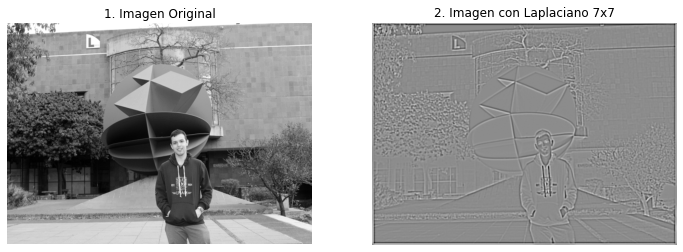

In [7]:
fig = plt.figure(figsize=(12, 12))

fig.add_subplot(1, 2, 1)
plt.imshow(imagen, cmap = plt.cm.gray)
plt.title("1. Imagen Original")
plt.axis("off")

fig.add_subplot(1, 2, 2)
plt.imshow(imagen_filtrada, cmap = plt.cm.gray)
plt.title("2. Imagen con Laplaciano 7x7")
plt.axis("off")

**2. Crear un Filtro binomial de derivada en  x = 2 y derivada en y = 3 o 5**

In [8]:
def generar_derivada(orden: int, orden_x: int, orden_y: int):
  # Obtenemos la derivada en X
  derivada_x = np.array([generar_coef(orden_x, orden - 1)])

  # Obtenemos la derivada en Y
  derivada_y = np.array([generar_coef(orden_y, orden - 1)])

  # Obtenemos la de primer orden
  derivada_0 = np.array([generar_coef(0, orden - 1)])

  # Calculamos la derivada en x e y
  return derivada_0.transpose() * derivada_x + derivada_0 * derivada_y.transpose()

Probamos el filtro binomial para derivada de $x=2$ y derivada de $y=3$


\begin{equation}
  f_b(x, y) = \frac{\partial f(x, y)}{∂ x^2 y^0} + \frac{\partial f(x, y)}{∂ y^3 x^0}
\end{equation}

(-0.5, 555.5, 405.5, -0.5)

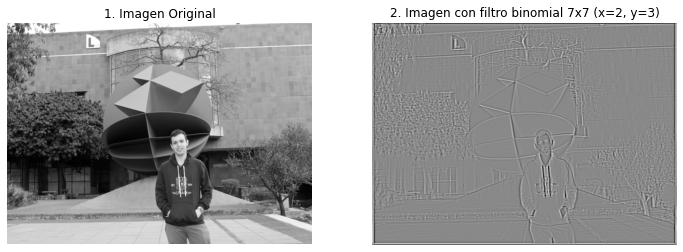

In [9]:
filtro_binomial = generar_derivada(orden = 7, orden_x = 2, orden_y = 3)
imagen_filtrada_binomial = signal.convolve2d(imagen, filtro_binomial)

fig = plt.figure(figsize=(12, 12))

fig.add_subplot(1, 2, 1)
plt.imshow(imagen, cmap = plt.cm.gray)
plt.title("1. Imagen Original")
plt.axis("off")

fig.add_subplot(1, 2, 2)
plt.imshow(imagen_filtrada_binomial, cmap = plt.cm.gray)
plt.title("2. Imagen con filtro binomial 7x7 (x=2, y=3)")
plt.axis("off")

In [10]:
filtro_binomial

array([[   2.,    8.,   14.,   16.,   14.,    8.,    2.],
       [   6.,   12.,   -6.,  -24.,   -6.,   12.,    6.],
       [  12.,   12.,  -60., -120.,  -60.,   12.,   12.],
       [  20.,   40.,  -20.,  -80.,  -20.,   40.,   20.],
       [  18.,   48.,   30.,    0.,   30.,   48.,   18.],
       [   6.,   12.,   -6.,  -24.,   -6.,   12.,    6.],
       [   0.,   -4.,  -16.,  -24.,  -16.,   -4.,    0.]])

Probamos ahora con el filtro binomial de $x=3$ e $y=5$

\begin{equation}
  f_b(x, y) = \frac{\partial f(x, y)}{∂ x^2 y^0} + \frac{\partial f(x, y)}{∂ y^5 x^0}
\end{equation}

(-0.5, 555.5, 405.5, -0.5)

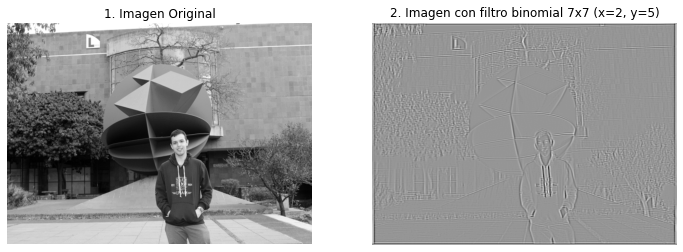

In [11]:
filtro_binomial_5 = generar_derivada(orden = 7, orden_x = 2, orden_y = 5)
imagen_filtrada_binomial_5 = signal.convolve2d(imagen, filtro_binomial_5)

fig = plt.figure(figsize=(12, 12))

fig.add_subplot(1, 2, 1)
plt.imshow(imagen, cmap = plt.cm.gray)
plt.title("1. Imagen Original")
plt.axis("off")

fig.add_subplot(1, 2, 2)
plt.imshow(imagen_filtrada_binomial_5, cmap = plt.cm.gray)
plt.title("2. Imagen con filtro binomial 7x7 (x=2, y=5)")
plt.axis("off")

In [12]:
filtro_binomial_5

array([[   2.,    8.,   14.,   16.,   14.,    8.,    2.],
       [   2.,  -12.,  -66., -104.,  -66.,  -12.,    2.],
       [  20.,   60.,   60.,   40.,   60.,   60.,   20.],
       [  20.,   40.,  -20.,  -80.,  -20.,   40.,   20.],
       [  10.,    0.,  -90., -160.,  -90.,    0.,   10.],
       [  10.,   36.,   54.,   56.,   54.,   36.,   10.],
       [   0.,   -4.,  -16.,  -24.,  -16.,   -4.,    0.]])

**Comparación**

(-0.5, 555.5, 405.5, -0.5)

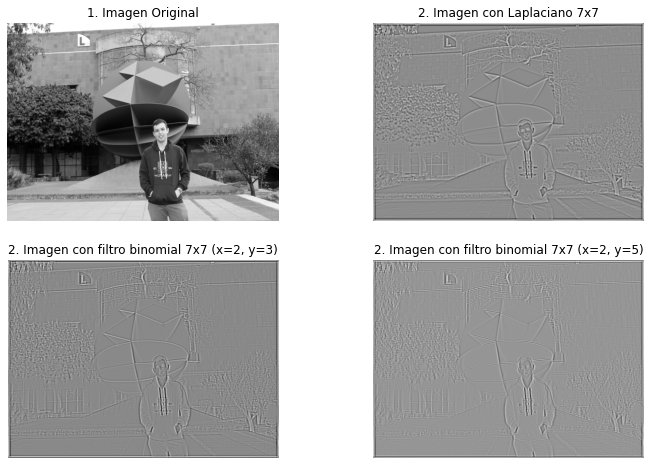

In [13]:
fig = plt.figure(figsize=(12, 8))

fig.add_subplot(2, 2, 1)
plt.imshow(imagen, cmap = plt.cm.gray)
plt.title("1. Imagen Original")
plt.axis("off")

fig.add_subplot(2, 2, 2)
plt.imshow(imagen_filtrada, cmap = plt.cm.gray)
plt.title("2. Imagen con Laplaciano 7x7")
plt.axis("off")

fig.add_subplot(2, 2, 4)
plt.imshow(imagen_filtrada_binomial_5, cmap = plt.cm.gray)
plt.title("2. Imagen con filtro binomial 7x7 (x=2, y=5)")
plt.axis("off")

fig.add_subplot(2, 2, 3)
plt.imshow(imagen_filtrada_binomial, cmap = plt.cm.gray)
plt.title("2. Imagen con filtro binomial 7x7 (x=2, y=3)")
plt.axis("off")